#  1. CSV 파일 읽기 및 데이터 준비

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [2]:
df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [3]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

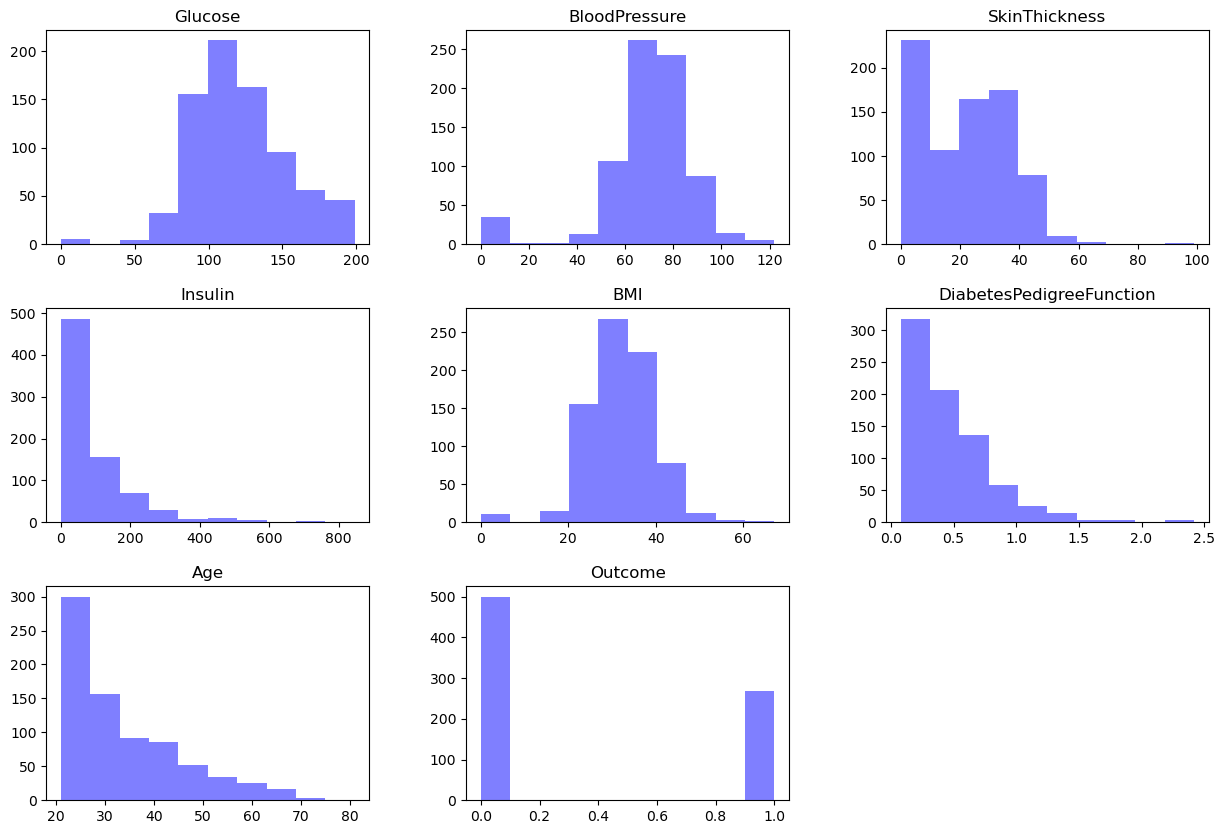

In [5]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='blue')

Text(0.5, 1.0, 'Age of diabetes')

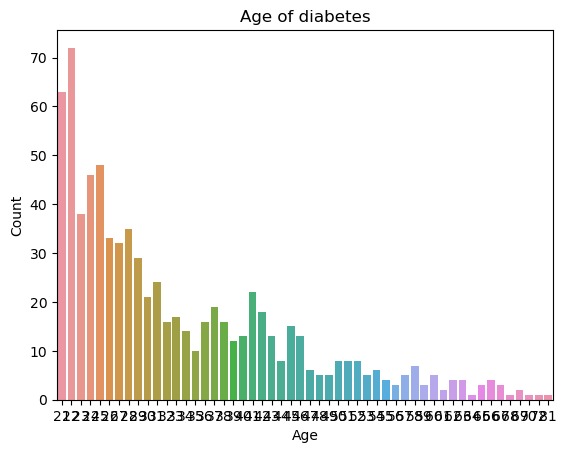

In [6]:
sns.countplot(data = df, x="Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of diabetes")

In [7]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [8]:
import pandas as pd

# 기존 diabetes 데이터셋 로드
# 데이터가 diabetes.csv 파일에 있다고 가정

# Age=1인 데이터와 Age=29인 데이터 추출
Age_1_data = df[df['Age'] == 1].copy()
Age_29_data = df[df['Age'] == 29].copy()

# Age=1인 데이터를 rings=0으로 변경
Age_1_data['Age'] = 0

# Age=29인 데이터를 rings=28로 변경
Age_29_data['Age'] = 28

# 기존 데이터에 Age=0과 rings=28 데이터를 추가
df = pd.concat([df, Age_1_data, Age_29_data], ignore_index=True)

# 추가된 데이터 확인
df['Age'].value_counts()

Age
22    72
28    64
21    63
25    48
24    46
23    38
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [9]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['BMI'] = label.fit_transform(df['BMI'])

df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,123,0.627,50,1
1,85,66,29,0,62,0.351,31,0
2,183,64,0,0,30,0.672,32,1
3,89,66,23,94,77,0.167,21,0
4,137,40,35,168,209,2.288,33,1
...,...,...,...,...,...,...,...,...
792,86,66,52,65,197,0.917,28,0
793,88,78,29,76,109,0.365,28,0
794,103,66,0,0,40,0.249,28,0
795,90,88,47,54,164,0.362,28,0


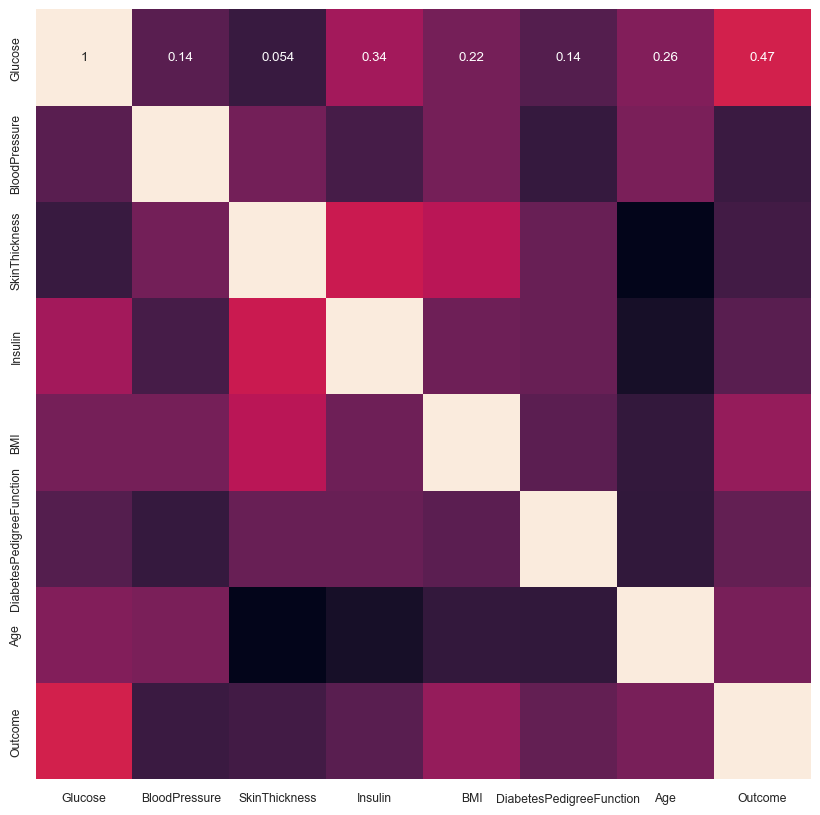

In [10]:
df_corr = df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome' ]]

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_corr.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [11]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,123,0.627,50,1
1,85,66,29,0,62,0.351,31,0
2,183,64,0,0,30,0.672,32,1
3,89,66,23,94,77,0.167,21,0
4,137,40,35,168,209,2.288,33,1
...,...,...,...,...,...,...,...,...
792,86,66,52,65,197,0.917,28,0
793,88,78,29,76,109,0.365,28,0
794,103,66,0,0,40,0.249,28,0
795,90,88,47,54,164,0.362,28,0


In [12]:
# df의 기본적인 통계량 수치 파악, 각 열마다의 데이터 타입 

for feature in df.columns :
    print (f'{feature}의 데이터 타입 : ', df[feature].dtype)

df.describe()

Glucose의 데이터 타입 :  int64
BloodPressure의 데이터 타입 :  int64
SkinThickness의 데이터 타입 :  int64
Insulin의 데이터 타입 :  int64
BMI의 데이터 타입 :  int64
DiabetesPedigreeFunction의 데이터 타입 :  float64
Age의 데이터 타입 :  int64
Outcome의 데이터 타입 :  int64


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,121.130489,69.074028,20.553325,80.126725,112.573400,0.469585,33.050188,0.352572
std,31.867274,19.416314,16.037604,115.245947,59.350536,0.328111,11.585708,0.478071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,64.000000,0.000000,0.000000,70.000000,0.243000,24.000000,0.000000
50%,117.000000,72.000000,23.000000,29.000000,109.000000,0.370000,29.000000,0.000000
75%,141.000000,80.000000,33.000000,129.000000,153.000000,0.619000,40.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,247.000000,2.420000,81.000000,1.000000


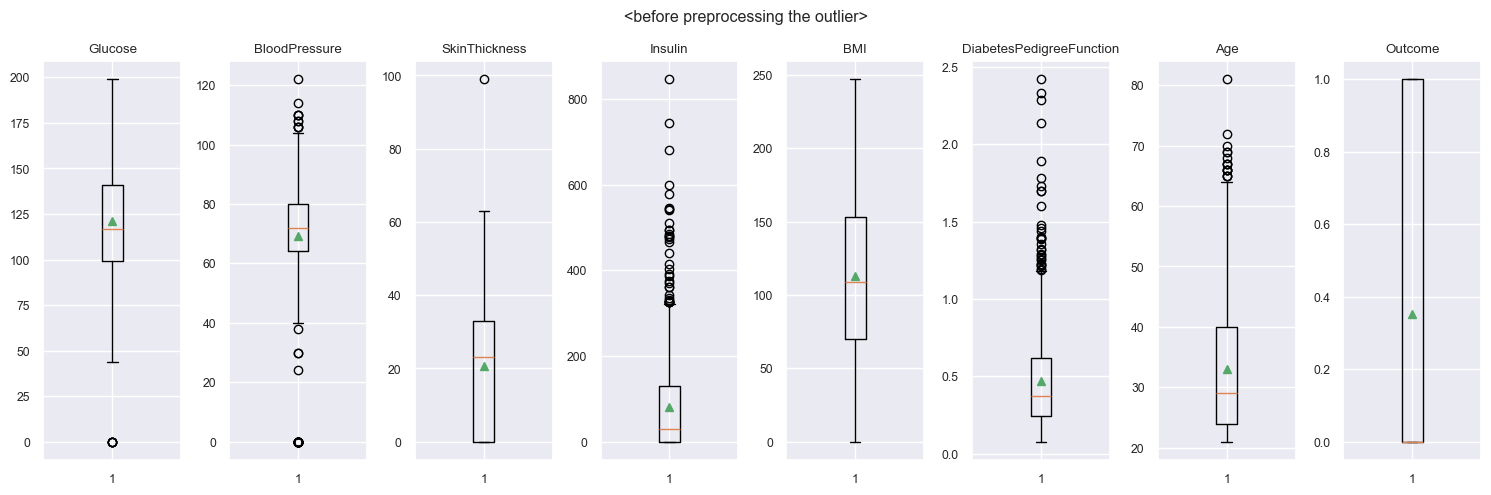

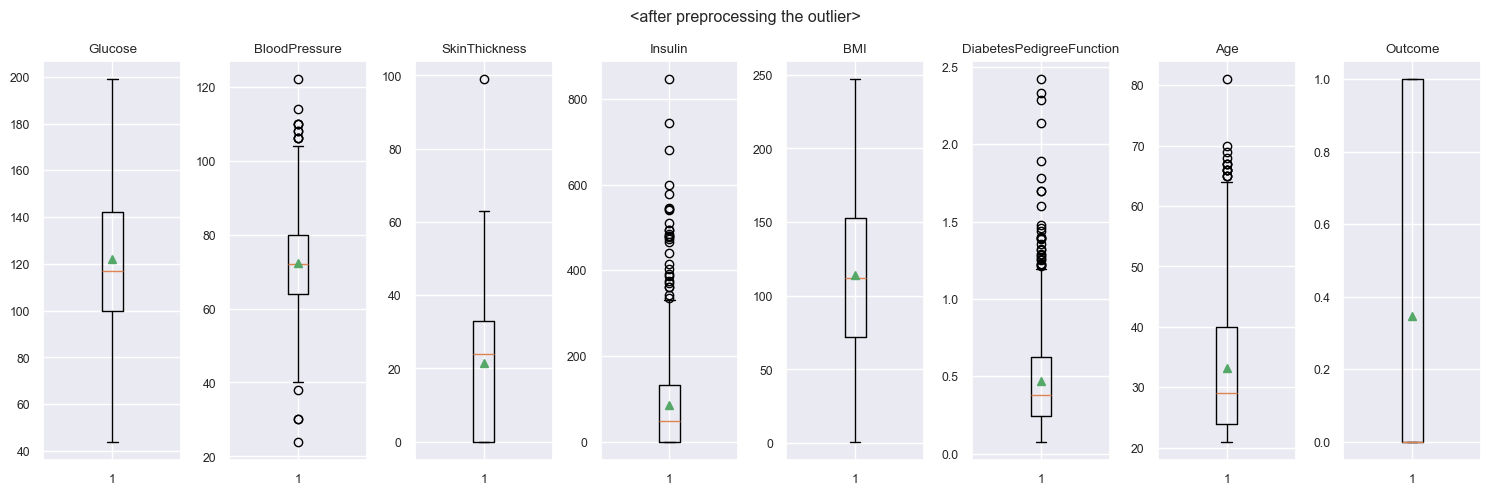

In [13]:
# subplot 시각화 및 outlier 전처리

fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

fig.suptitle("<before preprocessing the outlier>")
plt.tight_layout()
plt.show()

#############

# outlier 제거 및 다시 boxplot 시각화

df = df[(df['BMI'] != 0) & (df['Glucose'] != 0) & (df['BloodPressure'] != 0)] 
# 특정 feature가 0이 되는 지점이 결측치가 된다

fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

fig.suptitle("<after preprocessing the outlier>")
plt.tight_layout()
plt.show()

Outcome
0    490
1    261
Name: count, dtype: int64

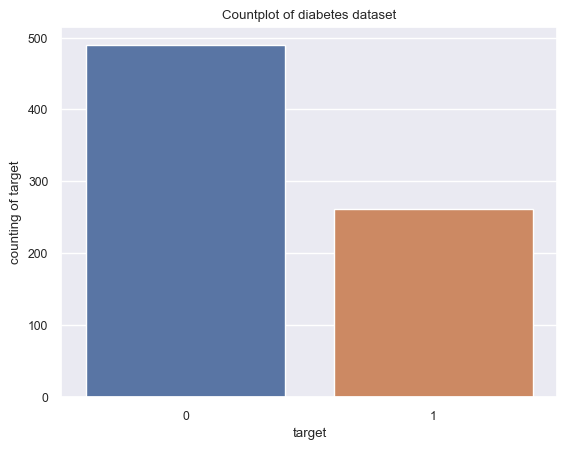

In [14]:
# target 별 counting

sns.countplot(data = df, x="Outcome")
plt.xlabel('target')
plt.ylabel("counting of target")
plt.title('Countplot of diabetes dataset')

df['Outcome'].value_counts()

In [15]:
'''
    oversampling과 undersampling을 함수로 구현한다. 
'''
    
def sampling(df, target_col, max_size) :
    # 결과를 저장할 리스트 
    dfs = []
    
    for label in df[target_col].unique() :
        class_df = df[df[target_col] == label]
        
        if len(class_df) < max_size :
            # 샘플 수가 max_size보다 적으면 데이터를 복제하여 max_size로 만듦
            sampled_df = class_df.sample(max_size, replace=True, random_state=42)
        else :
            # 샘플 수가 max_size보다 많으면 앞부분부터 max_size만큼 선택함
            sampled_df = class_df.head(max_size)
        
        # 리스트에 추가
        dfs.append(sampled_df)
    
    df_resampled = pd.concat(dfs).reset_index(drop=True)
    
    return df_resampled

df_resampled = sampling(df, 'Outcome', max_size=2000)
print (df_resampled['Outcome'].value_counts())

Outcome
1    2000
0    2000
Name: count, dtype: int64


In [18]:
def add_noise(data: pd.DataFrame, noise_level: float) -> pd.DataFrame :
    noisy_data = data.copy()
    feature_columns = noisy_data.columns.difference(['Outcome'])  
    noise = np.random.normal(loc=0, scale=noise_level, size=noisy_data[feature_columns].shape)
    noisy_data[feature_columns] += noise
    return noisy_data

In [19]:
def mixup_data_binary(data: pd.DataFrame, alpha: float) -> pd.DataFrame : 
    feature_columns = data.columns.difference(['Outcome']) 
    num_samples = len(data)
    
    lambdas = np.random.beta(alpha, alpha, size=num_samples)
    mixed_data = data.copy()
    
    for i in range(num_samples) :
        # 랜덤하게 다른 샘플 선택
        j = np.random.choice(num_samples)
        
        # 특성 섞기
        mixed_data.loc[i, feature_columns] = lambdas[i] * data.loc[i, feature_columns] + (1 - lambdas[i]) * data.loc[j, feature_columns]
        
        # 타겟 섞기 및 0 또는 1로 "반올림"
        mixed_data.loc[i, 'Outcome'] = round(lambdas[i] * data.loc[i, 'Outcome'] + (1 - lambdas[i]) * data.loc[j, 'Outcome'])
    
    return mixed_data

In [20]:
# 노이즈 추가
noisy_data = add_noise(df_resampled, noise_level=0.2)

# Mixup 적용
augmented_data = mixup_data_binary(noisy_data, alpha=0.2)

# df_augmented
df_augmented = augmented_data

print ("after augmentation : ", df_augmented.shape)
df_augmented.head()

after augmentation :  (4000, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,154.545195,85.626591,28.086198,152.321433,130.651294,1.087791,41.161881,1
1,155.114602,61.936472,26.224632,494.876214,127.443356,0.194664,45.636353,1
2,160.009786,89.124238,1.733953,15.357391,110.299729,1.220271,65.418860,1
3,107.202909,80.662022,35.040704,16.489543,195.232664,0.763088,39.796777,1
4,158.795258,72.239768,29.651024,323.233116,146.143985,0.304177,36.371625,1


In [21]:
# split the input, target

diabetes_input = df_augmented.drop(columns=['Outcome'])
diabetes_target = df_augmented['Outcome']

print (diabetes_input.head())
print ('\n')
print (diabetes_target.head())

      Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
0  154.545195      85.626591      28.086198  152.321433  130.651294   
1  155.114602      61.936472      26.224632  494.876214  127.443356   
2  160.009786      89.124238       1.733953   15.357391  110.299729   
3  107.202909      80.662022      35.040704   16.489543  195.232664   
4  158.795258      72.239768      29.651024  323.233116  146.143985   

   DiabetesPedigreeFunction        Age  
0                  1.087791  41.161881  
1                  0.194664  45.636353  
2                  1.220271  65.418860  
3                  0.763088  39.796777  
4                  0.304177  36.371625  


0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


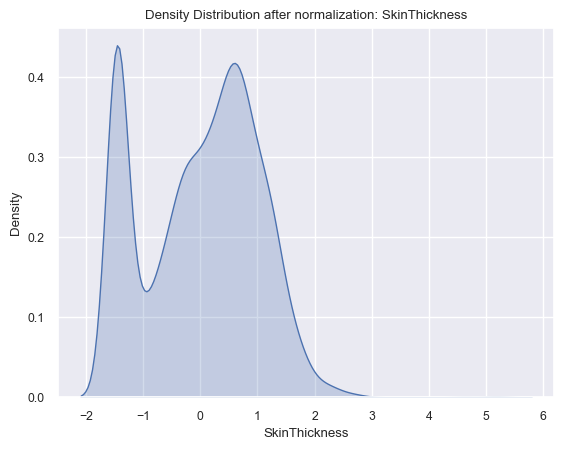

In [22]:
# Z-score normalization

from sklearn.preprocessing import StandardScaler

features = df_augmented.columns[:-1]  # 'Outcome' 제외

normalizer = StandardScaler()
diabetes_input_scaled = pd.DataFrame(normalizer.fit_transform(diabetes_input), 
                              columns=features)  

# 예시로, SkinThickness를 시각화하여 normalization이 잘 되었는지 확인해보기
sns.kdeplot(diabetes_input_scaled['SkinThickness'], fill=True)
plt.title(f'Density Distribution after normalization: SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Density')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_input_scaled,
                                                    diabetes_target,
                                                    stratify=diabetes_target,
                                                    test_size = 0.2) 

X_train.shape, y_train.shape 

((3200, 7), (3200,))

In [24]:
'''
    순환 데이터를 구성하기 위하여 split_sequences를 사용하였다.
    이때, 각 window마다 class의 빈도 수를 측정하여 가장 많은 빈도수를 가진 class가 target이 되는 방식을 취하였다.
'''

from collections import Counter
import numpy as np
from collections import Counter

def split_sequences_freq(sequences, n_steps):
    X, y = list(), list()
    
    # Check if sequences is a DataFrame, convert if necessary
    if not isinstance(sequences, pd.DataFrame):
        sequences = pd.DataFrame(sequences)

    for i in range(len(sequences)):
        end_ix = i + n_steps

        if end_ix > len(sequences):
            break

        seq_x = sequences.iloc[i:end_ix, :-1].values
        seq_y = sequences.iloc[i:end_ix, -1].values   
        
        # Find the most frequent class in seq_y
        most_frequent_class = Counter(seq_y).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(int(most_frequent_class))

    return np.array(X), np.array(y)
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

print ("before : ", train_set.shape, test_set.shape)

X_train_seq, y_train_seq = split_sequences_freq(train_set, 5) # 5개씩 묶기
print (X_train_seq)
print (y_train_seq)

print ("train : ", X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences_freq(test_set, 5)
print (X_test_seq)
print (y_test_seq)

print ("test : ", X_test_seq.shape, y_test_seq.shape)


before :  (3200, 8) (800, 8)
[[[-7.67328306e-01 -7.51366918e-01 -1.23294665e-01 ... -1.37545467e+00
    1.41348412e-01 -8.13349739e-01]
  [-1.04126216e+00 -2.14093274e-01  3.69206415e-01 ...  1.81429467e+00
   -1.11804299e-01 -1.17488390e+00]
  [-2.86478650e-01  6.19009236e-01  8.96904764e-01 ... -5.77344307e-01
   -1.85432982e+00 -4.80735604e-01]
  [ 2.15658770e-01 -4.86034278e-02 -1.16902749e+00 ... -6.38471431e-01
   -8.71276422e-02 -4.75442486e-01]
  [ 1.66897992e+00  2.31218506e+00  2.65512509e-01 ...  2.85749418e-01
   -1.50137903e+00  5.01457922e-01]]

 [[-1.04126216e+00 -2.14093274e-01  3.69206415e-01 ...  1.81429467e+00
   -1.11804299e-01 -1.17488390e+00]
  [-2.86478650e-01  6.19009236e-01  8.96904764e-01 ... -5.77344307e-01
   -1.85432982e+00 -4.80735604e-01]
  [ 2.15658770e-01 -4.86034278e-02 -1.16902749e+00 ... -6.38471431e-01
   -8.71276422e-02 -4.75442486e-01]
  [ 1.66897992e+00  2.31218506e+00  2.65512509e-01 ...  2.85749418e-01
   -1.50137903e+00  5.01457922e-01]
  [-2.

In [25]:
# 실제로 어떻게 구성되었는지 X_train_seq와 y_train_seq의 앞쪽 5개의 component만 출력

print (np.isnan(y_train_seq).sum())

for idx in range (5) :
    print (f"X_train_seq[{idx}] : ", X_train_seq[idx][:5])
    print (f"y_train_seq[{idx}] : ", y_train_seq[idx])
    
    if idx == 0 : 
        prev = X_train_seq[idx]
        print()
        continue

    if (prev[1:] == X_train_seq[idx][:-1]).all() : 
        '''
            step 1씩 이동했으니깐, 이전 X_train_seq 원소의 2번째 record ~ 마지막번째 record와
            현재 X_train_seq 원소의 첫번째 record ~ 마지막-1번째 record는 같을 수밖에 없습니다.
        '''
         
        print ("window가 step 1씩 이동하면서 순환 데이터를 만듦")
    
    prev = X_train_seq[idx]
    print()

0
X_train_seq[0] :  [[-0.76732831 -0.75136692 -0.12329466 -0.12598565 -1.37545467  0.14134841
  -0.81334974]
 [-1.04126216 -0.21409327  0.36920641  0.18633853  1.81429467 -0.1118043
  -1.1748839 ]
 [-0.28647865  0.61900924  0.89690476 -0.77013942 -0.57734431 -1.85432982
  -0.4807356 ]
 [ 0.21565877 -0.04860343 -1.16902749 -0.49535345 -0.63847143 -0.08712764
  -0.47544249]
 [ 1.66897992  2.31218506  0.26551251 -0.78507084  0.28574942 -1.50137903
   0.50145792]]
y_train_seq[0] :  1

X_train_seq[1] :  [[-1.04126216 -0.21409327  0.36920641  0.18633853  1.81429467 -0.1118043
  -1.1748839 ]
 [-0.28647865  0.61900924  0.89690476 -0.77013942 -0.57734431 -1.85432982
  -0.4807356 ]
 [ 0.21565877 -0.04860343 -1.16902749 -0.49535345 -0.63847143 -0.08712764
  -0.47544249]
 [ 1.66897992  2.31218506  0.26551251 -0.78507084  0.28574942 -1.50137903
   0.50145792]
 [-0.28616866 -0.22888046  0.29433612 -0.78567073  0.53191495  0.06197998
   0.10979953]]
y_train_seq[1] :  1
window가 step 1씩 이동하면서 순환 데이터를 만

In [26]:
# one-hot encoding 

from tensorflow.keras.utils import to_categorical

y_train_seq_encoded = to_categorical(y_train_seq)
y_test_seq_encoded = to_categorical(y_test_seq)

print(y_train_seq[:5])  
print(y_train_seq_encoded[:5]) 

print(y_test_seq[:5])  
print(y_test_seq_encoded[:5]) 

[1 1 1 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1 1 1 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [27]:
# modeling

from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

def make_model(input_shape) :
    input_layer = Input(shape=input_shape)
    
    # '''
    #     계속적으로 val_loss가 늘어나는 현상 발견
    #     regularizer를 추가하여 l2 규제를 하게끔 함
    #     l1 규제 : 절댓값 규제 (특정 feature을 0으로 만들 수 있음)
    #     l2 규제 : 제곱 규제 (특정 feature을 0과 가깝게 만들 수 있음)
    #  
    #     -> 원래 규제 속성을 추가하려다가, 모델이 overfitting 없이 loss를 잘 control하는 것을 확인 후 제거한다.
    # '''

    '''
        점점 kernel size를 늘려나가서 feature extraction을 효과적으로 할 수 있도록 구성하였다.
        dense layer를 여기서 더 추가하면 overfitting이 일어나서, 여기서 멈춘다.
    '''

    # block 1
    conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
    batch_norm1 = BatchNormalization()(conv1)
    dropout1 = Dropout(0.6)(batch_norm1)

    # block 2
    conv2 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(dropout1)
    batch_norm2 = BatchNormalization()(conv2)
    dropout2 = Dropout(0.5)(batch_norm2)

    # block 3
    conv3 = Conv1D(filters=16, kernel_size=4, activation='relu', padding='same')(dropout2)
    batch_norm3 = BatchNormalization()(conv3)
    dropout3 = Dropout(0.4)(batch_norm3)

    # flatten
    flat = Flatten()(dropout3)

    # dense layers
    dense1 = Dense(50, activation='relu')(flat)
    dense2 = Dense(30, activation='relu')(dense1)
    output_layer = Dense(2, activation='softmax')(dense2)

    model = Model(inputs=input_layer, outputs=output_layer)

    return model

model = make_model(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

model.summary()

plot_model(model, 
           show_shapes=True, show_layer_activations=True, 
           show_dtype=True, show_layer_names=True, show_trainable=True)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 4, 64)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 16)          │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,490 (56.60 KB)

 Trainable params: 14,266 (55.73 KB)

 Non-trainable params: 224 (896.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [29]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer, 
               loss='binary_crossentropy', 
               metrics=['accuracy'])
# fit

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model(model, X_train_seq, y_train_seq) :
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
    
    history = model.fit(X_train_seq, y_train_seq, epochs=100, 
                        validation_split=0.2,
                        batch_size=256,
                        callbacks=[early_stopping_cb], 
                        verbose=True, shuffle=True)
    
    return history

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])  # (n_steps, 특징 수)
history = train_model(model, X_train_seq, y_train_seq_encoded)

ERROR: Could not find file /var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_21471/1301598896.py
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5045 - loss: 0.7982 - val_accuracy: 0.4938 - val_loss: 0.6933
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5071 - loss: 0.7329 - val_accuracy: 0.5250 - val_loss: 0.6917
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5205 - loss: 0.7234 - val_accuracy: 0.5219 - val_loss: 0.6909
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5594 - loss: 0.7043 - val_accuracy: 0.5453 - val_loss: 0.6902
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5616 - loss: 0.6971 - val_accuracy: 0.5641 - val_loss: 0.6888
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5900 - loss: 0.6830 - val_accuracy: 0.5766 - val_loss: 0.6860
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5956 - loss: 0.6739 - val_accuracy: 0.5922 - val_loss: 0.6820
Epoc

Epoch 51/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7014 - loss: 0.5777 - val_accuracy: 0.6828 - val_loss: 0.5927
Epoch 52/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7046 - loss: 0.5636 - val_accuracy: 0.6875 - val_loss: 0.5933
Epoch 53/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7065 - loss: 0.5702 - val_accuracy: 0.6875 - val_loss: 0.5893
Epoch 54/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6824 - loss: 0.5859 - val_accuracy: 0.6875 - val_loss: 0.5885
Epoch 55/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6893 - loss: 0.5762 - val_accuracy: 0.6938 - val_loss: 0.5926
Epoch 56/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6918 - loss: 0.5768 - val_accuracy: 0.6953 - val_loss: 0.5900
Epoch 57/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6986 - loss: 0.5718 - val_accuracy: 0.6922 - val_loss: 0.5911
Epoch 58/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7040 - loss: 0.5762 - val_accuracy: 0.

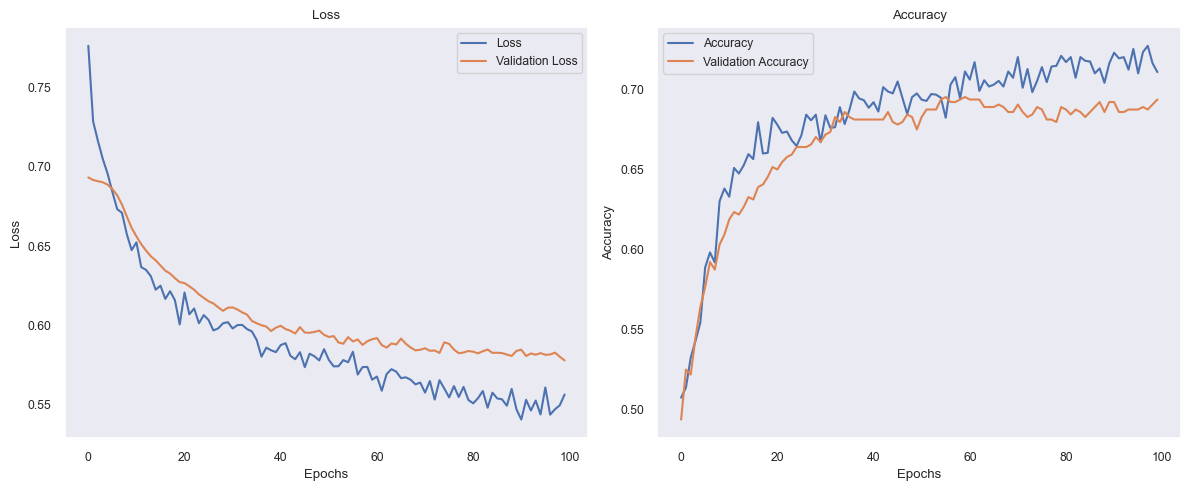

In [30]:
# loss와 validation loss, acc와 validation acc를 시각화하기 위한 메소드

def draw_history (history) :
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(history.history['loss'], label='Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].grid()

    ax[1].plot(history.history['accuracy'], label='Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].grid()

    plt.tight_layout()
    plt.show()

draw_history(history)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix


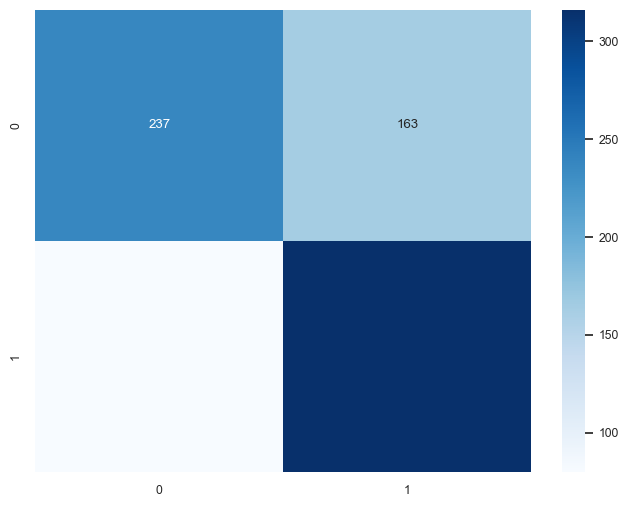

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       400
           1       0.66      0.80      0.72       396

    accuracy                           0.69       796
   macro avg       0.70      0.70      0.69       796
weighted avg       0.70      0.69      0.69       796



In [31]:
# confusion matrix, classification report, accuracy

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_test_arg = np.argmax(y_test_seq_encoded, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print ('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

# classification report
report = classification_report(y_test_arg, Y_pred)
print (report)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


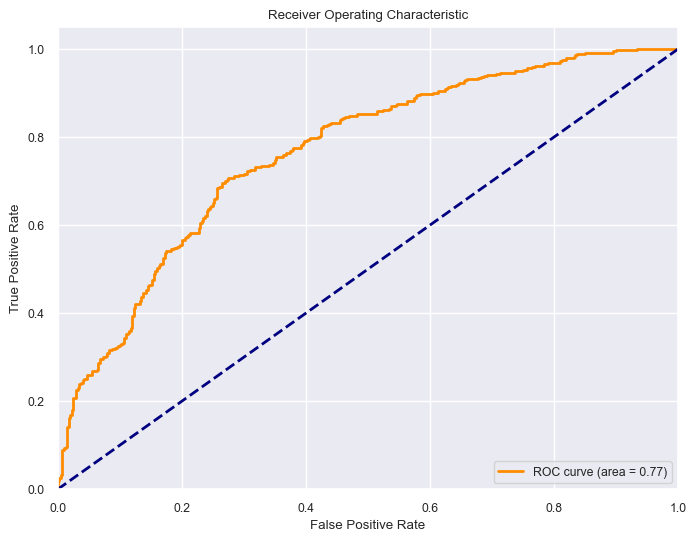

In [32]:
# ROC 시각화

from sklearn.metrics import roc_curve, roc_auc_score

y_test_pred_proba = model.predict(X_test_seq)
fpr, tpr, thresholds = roc_curve(y_test_seq, y_test_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test_seq, y_test_pred_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [33]:
# evaluate

print ("train score : ", model.evaluate(X_train_seq, y_train_seq_encoded))
print ("test score : ", model.evaluate(X_test_seq, y_test_seq_encoded))

eval_1 = model.evaluate(X_test_seq, y_test_seq_encoded)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.7706 - loss: 0.4858
train score :  [0.5217519402503967, 0.7421777248382568]
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7021 - loss: 0.5841
test score :  [0.580425500869751, 0.6947236061096191]
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7021 - loss: 0.5841


In [34]:
# model save

model_file = './model/base_CNN-DNN_diabetes.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)

model saved at  ./model/base_CNN-DNN_diabetes.h5


In [35]:
# base 모델 로드 './model/base_CNN-DNN_diabetes.h5'

from tensorflow.keras.models import load_model

base_model = load_model(model_file)
base_model

<Functional name=functional_1, built=True>

In [36]:
# base 모델에 train data, test data를 evaluate시켜본다.

base_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
print ("train : ", base_model.evaluate(X_train_seq, y_train_seq_encoded))
print ("test : ", base_model.evaluate(X_test_seq, y_test_seq_encoded))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7706 - loss: 0.4858 
train :  [0.5217519402503967, 0.7421777248382568]
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.7021 - loss: 0.5841
test :  [0.580425500869751, 0.6947236061096191]


In [37]:
# 이전 모델의 feature extraction 부분을 trainable=False로 둔다. (학습이 새롭게 되어 가중치 학습 X)

for i, layer in enumerate(base_model.layers) : 
    print (f'{i+1}번째 layer (base_model) : {layer}')
    
print ()

model_layers = []

for i in range (0, len(base_model.layers)-1) : # -1하여 마지막 출력층은 추가하지 않도록 함
    base_model.layers[i].trainable = False # 학습하지 않도록 False로 구성
    model_layers.append (base_model.layers[i])
    
print ()

for i, layer in enumerate(base_model.layers) : 
    if layer.trainable == False : 
        print (f'{i+1}번째 layer인 {layer}의 trainable 여부가 False가 됨')

1번째 layer (base_model) : <InputLayer name=input_layer, built=True>
2번째 layer (base_model) : <Conv1D name=conv1d, built=True>
3번째 layer (base_model) : <BatchNormalization name=batch_normalization, built=True>
4번째 layer (base_model) : <Dropout name=dropout, built=True>
5번째 layer (base_model) : <Conv1D name=conv1d_1, built=True>
6번째 layer (base_model) : <BatchNormalization name=batch_normalization_1, built=True>
7번째 layer (base_model) : <Dropout name=dropout_1, built=True>
8번째 layer (base_model) : <Conv1D name=conv1d_2, built=True>
9번째 layer (base_model) : <BatchNormalization name=batch_normalization_2, built=True>
10번째 layer (base_model) : <Dropout name=dropout_2, built=True>
11번째 layer (base_model) : <Flatten name=flatten, built=True>
12번째 layer (base_model) : <Dense name=dense, built=True>
13번째 layer (base_model) : <Dense name=dense_1, built=True>
14번째 layer (base_model) : <Dense name=dense_2, built=True>


1번째 layer인 <InputLayer name=input_layer, built=True>의 trainable 여부가 False가 됨
2번

In [38]:
# # 기존 LA 모델에서 feature extraction은 가져온다
# -> 끝에 클래스 수만큼 노드를 배치하여 분류할 수 있도록 한다 (기존 모델의 마지막 열은 가져오면 안된다 (출력층은 X))

model_transfer = Sequential(model_layers)
model_transfer.add(Dropout(0.4))
model_transfer.add(Dense(32, activation='relu'))
model_transfer.add(Dense(2, activation='sigmoid'))

# compile
model_transfer.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

# visualization
model_transfer.summary()
display_layers = [(layer, layer.name, layer.trainable) for layer in model_transfer.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 64)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 16)          │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,486 (60.49 KB)

 Trainable params: 1,058 (4.13 KB)

 Non-trainable params: 14,428 (56.36 KB)

,Layer Type,Layer Name,Layer Trainable
0,"<Conv1D name=conv1d, built=True>",conv1d,False
1,"<BatchNormalization name=batch_normalization, ...",batch_normalization,False
2,"<Dropout name=dropout, built=True>",dropout,False
3,"<Conv1D name=conv1d_1, built=True>",conv1d_1,False
4,<BatchNormalization name=batch_normalization_1...,batch_normalization_1,False
5,"<Dropout name=dropout_1, built=True>",dropout_1,False
6,"<Conv1D name=conv1d_2, built=True>",conv1d_2,False
7,<BatchNormalization name=batch_normalization_2...,batch_normalization_2,False
8,"<Dropout name=dropout_2, built=True>",dropout_2,False
9,"<Flatten name=flatten, built=True>",flatten,False


In [39]:
# fit

early_stopping_cb = keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

history_transfer = model_transfer.fit(X_train_seq, y_train_seq_encoded, epochs=100, 
                        validation_split=0.2,
                        batch_size=256,
                        callbacks=[early_stopping_cb], 
                        verbose=True, shuffle=True)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4579 - loss: 0.7921 - val_accuracy: 0.5609 - val_loss: 0.6840
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5744 - loss: 0.6980 - val_accuracy: 0.6984 - val_loss: 0.6398
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6634 - loss: 0.6309 - val_accuracy: 0.6953 - val_loss: 0.6116
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6769 - loss: 0.6146 - val_accuracy: 0.6922 - val_loss: 0.5966
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6963 - loss: 0.6000 - val_accuracy: 0.6922 - val_loss: 0.5887
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5714 - val_accuracy: 0.6922 - val_loss: 0.5884
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7156 - loss: 0.5682 - val_accuracy: 0.6922 - val_loss: 0.5870
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.5690 - val_accuracy: 0.6938 - 

In [40]:
# evaluate

print ("train score : ", model_transfer.evaluate(X_train_seq, y_train_seq_encoded))
print ("test score : ", model_transfer.evaluate(X_test_seq, y_test_seq_encoded))

eval_2 = model_transfer.evaluate(X_test_seq, y_test_seq_encoded)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.7724 - loss: 0.4937
train score :  [0.5281733274459839, 0.7428035140037537]
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.6983 - loss: 0.5922
test score :  [0.5877995491027832, 0.6909547448158264]
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.6983 - loss: 0.5922


In [41]:
# fine tuning 진행을 위해 trainable=True 후 다시 modeling

model_layers = []

for i in range (0, len(base_model.layers)-1) : # -1하여 마지막 출력층은 추가하지 않도록 함
    if base_model.layers[i].trainable == False : 
        base_model.layers[i].trainable = True 
        
        model_layers.append (base_model.layers[i])
    
print ()

model_transfer = Sequential(model_layers)
model_transfer.add(Dropout(0.5))
model_transfer.add(Dense(256, activation='relu'))
model_transfer.add(Dropout(0.5))
model_transfer.add(Dense(128, activation='relu'))
model_transfer.add(Dropout(0.4))
model_transfer.add(Dense(64, activation='relu'))
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(32, activation='relu'))
model_transfer.add(Dense(2, activation='sigmoid'))

# compile 
model_transfer.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

# visualization
model_transfer.summary()
display_layers = [(layer, layer.name, layer.trainable) for layer in model_transfer.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 64)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 16)          │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,662 (256.49 KB)

 Trainable params: 65,438 (255.62 KB)

 Non-trainable params: 224 (896.00 B)

,Layer Type,Layer Name,Layer Trainable
0,"<Conv1D name=conv1d, built=True>",conv1d,True
1,"<BatchNormalization name=batch_normalization, ...",batch_normalization,True
2,"<Dropout name=dropout, built=True>",dropout,True
3,"<Conv1D name=conv1d_1, built=True>",conv1d_1,True
4,<BatchNormalization name=batch_normalization_1...,batch_normalization_1,True
5,"<Dropout name=dropout_1, built=True>",dropout_1,True
6,"<Conv1D name=conv1d_2, built=True>",conv1d_2,True
7,<BatchNormalization name=batch_normalization_2...,batch_normalization_2,True
8,"<Dropout name=dropout_2, built=True>",dropout_2,True
9,"<Flatten name=flatten, built=True>",flatten,True


In [42]:
# re-fit

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history_transfer = model_transfer.fit(X_train_seq, y_train_seq_encoded, epochs=100, 
                        validation_split=0.2,
                        batch_size=128,
                        callbacks=[early_stopping_cb], 
                        verbose=True, shuffle=True)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5084 - loss: 0.7465 - val_accuracy: 0.6969 - val_loss: 0.6582
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6336 - loss: 0.6430 - val_accuracy: 0.6969 - val_loss: 0.6068
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7018 - loss: 0.5901 - val_accuracy: 0.6969 - val_loss: 0.5897
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7157 - loss: 0.5842 - val_accuracy: 0.6875 - val_loss: 0.6004
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7146 - loss: 0.5578 - val_accuracy: 0.6875 - val_loss: 0.6006
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7232 - loss: 0.5720 - val_accuracy: 0.6875 - val_loss: 0.5936
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7162 - loss: 0.5793 - val_accuracy: 0.6953 - val_loss: 0.6017
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7214 - loss: 0.5585 - val_accuracy: 0.6969 - v

In [43]:
# evaluate

print ("train score : ", model_transfer.evaluate(X_train_seq, y_train_seq_encoded))
print ("test score : ", model_transfer.evaluate(X_test_seq, y_test_seq_encoded))

eval_3 = model_transfer.evaluate(X_test_seq, y_test_seq_encoded)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7748 - loss: 0.5183
train score :  [0.5479901432991028, 0.7418648600578308]
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.6841 - loss: 0.5988
test score :  [0.5969065427780151, 0.6783919334411621]
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6841 - loss: 0.5988


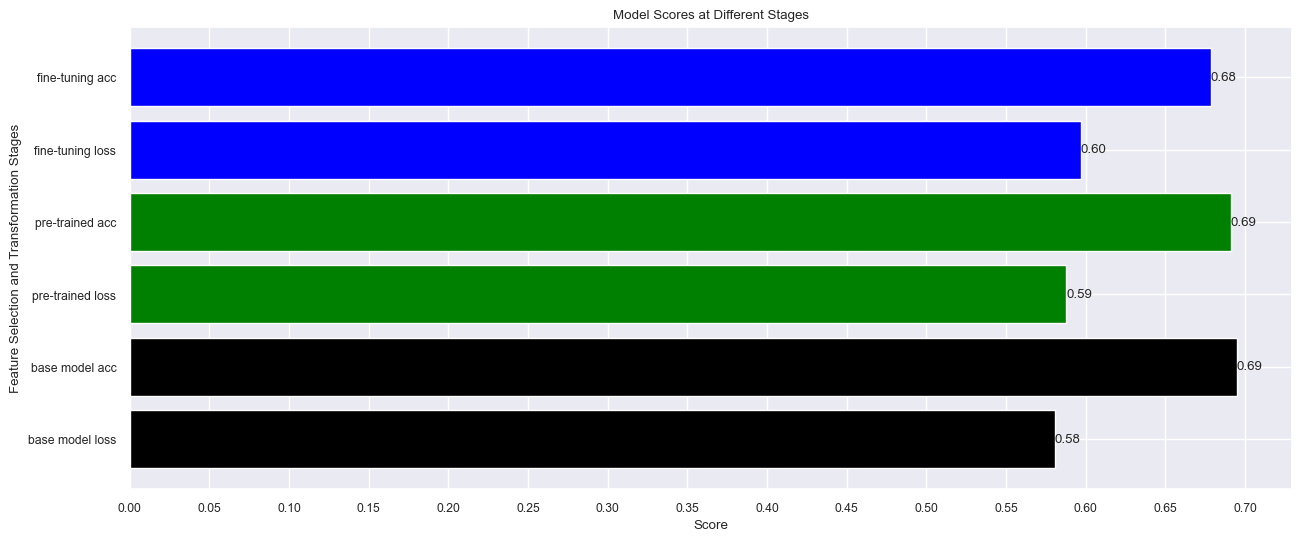

In [45]:
'''
    종합적으로 보기 위해 loss와 accuracy를 막대 그래프로 나타냄
'''

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

labels = [
    'base model loss',
    'base model acc',
    'pre-trained loss',
    'pre-trained acc',
    'fine-tuning loss',
    'fine-tuning acc',
]

score1 = eval_1
score2 = eval_2
score3 = eval_3

scores = [score1[0], score1[1], score2[0], score2[1], score3[0], score3[1]]

plt.figure(figsize=(15, 6))
bars = plt.barh(labels, scores, color=['black', 'black', 'green', 'green', 'blue', 'blue'])

for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2, f'{yval:.2f}', ha='left', va='center')

plt.xlabel('Score')
plt.ylabel('Feature Selection and Transformation Stages')
plt.title('Model Scores at Different Stages')

plt.xticks(np.arange(0, max(scores) + 0.05, 0.05))

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 소수점 2자리로 설정

plt.show()
